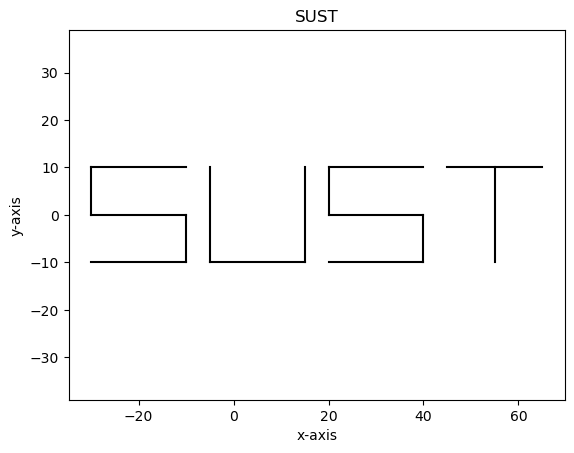

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Line drawing algorithm
def draw_line(x1, y1, x2, y2):
    is_steep = abs(y2 - y1) > abs(x2 - x1)
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    p = 2 * dy - dx
    x_values = []
    y_values = []
    x = x1
    y = y1
    while True:
        if is_steep:
            x_values.append(y)
            y_values.append(x)
        else:
            x_values.append(x)
            y_values.append(y)
        if x == x2 and y == y2:
            break
        if p < 0:
            p += 2 * dy
        else:
            y += sy
            p += 2 * dy - 2 * dx
        x += sx
    return x_values, y_values

# Circle drawing algorithm
def eight_way_symmetric_plot(cx, cy, x, y):
    points = [
        (x + cx, y + cy), (x + cx, -y + cy), (-x + cx, -y + cy), (-x + cx, y + cy),
        (y + cx, x + cy), (y + cx, -x + cy), (-y + cx, -x + cy), (-y + cx, x + cy)
    ]
    pointX, pointY = zip(*points)
    return list(pointX), list(pointY)

def circle_drawing(cx, cy, r):
    x = 0
    y = r
    d = 3 - 2 * r
    x_values = []
    y_values = []
    while x <= y:
        pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
        x_values.extend(pointX)
        y_values.extend(pointY)
        if d < 0:
            d += 4 * x + 6
        else:
            d += 4 * (x - y) + 10
            y -= 1
        x += 1
    return x_values, y_values

# Drawing the "SUST" structure

# "S" shape
s_values = []
s_values.append(draw_line(-30, 10, -10, 10))  # Top horizontal line
s_values.append(draw_line(-30, 10, -30, 0))   # Left vertical line
s_values.append(draw_line(-30, 0, -10, 0))    # Middle horizontal line
s_values.append(draw_line(-10, 0, -10, -10))  # Right vertical line
s_values.append(draw_line(-30, -10, -10, -10)) # Bottom horizontal line

# "U" shape
u_values = []
u_values.append(draw_line(-5, 10, -5, -10))  # Left vertical line
u_values.append(draw_line(15, 10, 15, -10))  # Right vertical line
u_values.append(draw_line(-5, -10, 15, -10))  # Bottom horizontal line

# "S" shape (second "S")
s2_values = []
s2_values.append(draw_line(20, 10, 40, 10))  # Top horizontal line
s2_values.append(draw_line(20, 10, 20, 0))   # Left vertical line
s2_values.append(draw_line(20, 0, 40, 0))    # Middle horizontal line
s2_values.append(draw_line(40, 0, 40, -10))  # Right vertical line
s2_values.append(draw_line(20, -10, 40, -10)) # Bottom horizontal line

# "T" shape
t_values = []
t_values.append(draw_line(45, 10, 65, 10))  # Top horizontal line
t_values.append(draw_line(55, 10, 55, -10)) # Vertical line

# Combining all line values
all_values = s_values + u_values + s2_values + t_values

# Unpacking
x_values, y_values = zip(*all_values)
x_values = [item for sublist in x_values for item in (sublist + [None])]
y_values = [item for sublist in y_values for item in (sublist + [None])]

# Plotting function
def plot_func():
    plt.plot(x_values, y_values, color='black')
    plt.title("SUST")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.axis("equal")
    plt.show()

plot_func()
